## **INTRODUCTION**

**Title:** Data Science Analysis of Pizza Sales

**Introduction**

In the ever-evolving landscape of the food industry, understanding customer preferences and sales patterns is crucial for business success. This analysis delves into a comprehensive dataset on pizza sales, aiming to uncover patterns and insights that can drive informed business decisions.

**Dataset Overview**

The dataset at hand offers a rich collection of features, encapsulating the dynamics of pizza sales. Key columns include:

**Pizza Attributes:**

pizza_id: Identifier for different types of pizzas.
pizza_name_id: A unique combination of pizza name and size.
pizza_size: Categorization of pizzas based on size.
pizza_category: Classification of pizzas into various categories.
pizza_ingredients: List of ingredients used in each pizza.
pizza_name: Name of the pizza.

**Order Details:**

order_id: Unique identifier for each order.
quantity: Number of pizzas ordered per transaction.
order_date & order_time: Timestamps providing temporal context to each order.

**Pricing Information:**

unit_price: Price of a single unit of pizza.
total_price: Total price for the order, serving as the target variable for our analysis.

**Objective**

The primary goal of this analysis is to understand the factors influencing total_price, with a particular focus on its relationship with unit_price and quantity. By analyzing these relationships, we aim to:

Identify trends and patterns in pizza sales.
Understand the impact of different pizza attributes on sales value.
Explore how temporal factors (date and time) affect total sales.

**Significance**

The insights derived from this study are expected to guide strategic decisions in menu planning, pricing strategies, and marketing efforts. Additionally, this analysis serves as a blueprint for leveraging data science in understanding consumer behavior in the food industry.

## **Importing the libraries**

In [224]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor

## **Importing the Dataset**

In [225]:
df=pd.read_csv('/content/pizza_sales.csv')
df.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1.0,1.0,hawaiian_m,1.0,1/1/2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2.0,2.0,classic_dlx_m,1.0,1/1/2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3.0,2.0,five_cheese_l,1.0,1/1/2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4.0,2.0,ital_supr_l,1.0,1/1/2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5.0,2.0,mexicana_m,1.0,1/1/2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


# **Q1. What are the data types? (Only numeric and categorical)**

In [226]:
df.dtypes

pizza_id             float64
order_id             float64
pizza_name_id         object
quantity             float64
order_date            object
order_time            object
unit_price           float64
total_price          float64
pizza_size            object
pizza_category        object
pizza_ingredients     object
pizza_name            object
dtype: object

The dataset contains both categorical and numeric dats types.
There are 7 categorical data columns and 5 numerical data columns

## **Q2. Are there missing values?**

In [227]:
df.isnull().sum()

pizza_id             0
order_id             0
pizza_name_id        0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64

The dataset has no null values in any of the columns.

Drop the columns containing IDs

In [139]:
df.drop(['order_id', 'pizza_id'], axis=1, inplace=True)

## **LABEL ENCODING**

Label encoding for pizza_size and pizza_column

In [228]:
# Create label encoders
label_encoder_name = LabelEncoder()
label_encoder_size = LabelEncoder()

# Fit and transform the label encoders for 'pizza_name' and 'pizza_size'
df['pizza_name'] = label_encoder_name.fit_transform(df['pizza_name'])
df['pizza_size'] = label_encoder_size.fit_transform(df['pizza_size'])
df.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1.0,1.0,hawaiian_m,1.0,1/1/2015,11:38:36,13.25,13.25,1,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",12
1,2.0,2.0,classic_dlx_m,1.0,1/1/2015,11:57:40,16.00,16.00,1,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",7
2,3.0,2.0,five_cheese_l,1.0,1/1/2015,11:57:40,18.50,18.50,0,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",8
3,4.0,2.0,ital_supr_l,1.0,1/1/2015,11:57:40,20.75,20.75,0,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",14
4,5.0,2.0,mexicana_m,1.0,1/1/2015,11:57:40,16.00,16.00,1,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",17


Label encoding for pizza_name_id by grouping pizza_name and pizza_size column

In [229]:
df['pizza_name_id'] = df['pizza_name'] * 100 + df['pizza_size']
df.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1.0,1.0,1201,1.0,1/1/2015,11:38:36,13.25,13.25,1,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",12
1,2.0,2.0,701,1.0,1/1/2015,11:57:40,16.00,16.00,1,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",7
2,3.0,2.0,800,1.0,1/1/2015,11:57:40,18.50,18.50,0,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",8
3,4.0,2.0,1400,1.0,1/1/2015,11:57:40,20.75,20.75,0,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",14
4,5.0,2.0,1701,1.0,1/1/2015,11:57:40,16.00,16.00,1,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",17


Converting order_date and order_time column

In [230]:
# Convert 'order_date' to datetime and replace values in the same column
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce', dayfirst=True)

# Extract the hour from 'order_time' and replace values in the same column
df['order_time'] = pd.to_datetime(df['order_time'], format='%H:%M:%S').dt.strftime('%H')

# Create 'order_date' column and replace values in the same 'order_date' column
df['order_date'] = df['order_date'].dt.day_name()
df.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1.0,1.0,1201,1.0,Thursday,11,13.25,13.25,1,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",12
1,2.0,2.0,701,1.0,Thursday,11,16.00,16.00,1,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",7
2,3.0,2.0,800,1.0,Thursday,11,18.50,18.50,0,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",8
3,4.0,2.0,1400,1.0,Thursday,11,20.75,20.75,0,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",14
4,5.0,2.0,1701,1.0,Thursday,11,16.00,16.00,1,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",17


Calculating the frequency of each ingredient in the 'pizza_ingredients' column and mapping the frequency of the ingridients

In [231]:
# Calculate the frequency of each ingredient in the 'pizza_ingredients' column
ingredient_freq = df['pizza_ingredients'].value_counts().to_dict()

# Map the frequencies to the 'pizza_ingredients' column
df['pizza_ingredients'] = df['pizza_ingredients'].map(ingredient_freq)
df.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1.0,1.0,1201,1.0,Thursday,11,13.25,13.25,1,Classic,2370,12
1,2.0,2.0,701,1.0,Thursday,11,16.00,16.00,1,Classic,2416,7
2,3.0,2.0,800,1.0,Thursday,11,18.50,18.50,0,Veggie,1359,8
3,4.0,2.0,1400,1.0,Thursday,11,20.75,20.75,0,Supreme,1849,14
4,5.0,2.0,1701,1.0,Thursday,11,16.00,16.00,1,Veggie,1456,17


Label encoding pizza_category

In [232]:
# Create a LabelEncoder instance
label_encoder = LabelEncoder()
# Fit and transform the 'pizza_category' column
df['pizza_category'] = label_encoder.fit_transform(df['pizza_category'])
df.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1.0,1.0,1201,1.0,Thursday,11,13.25,13.25,1,1,2370,12
1,2.0,2.0,701,1.0,Thursday,11,16.00,16.00,1,1,2416,7
2,3.0,2.0,800,1.0,Thursday,11,18.50,18.50,0,3,1359,8
3,4.0,2.0,1400,1.0,Thursday,11,20.75,20.75,0,2,1849,14
4,5.0,2.0,1701,1.0,Thursday,11,16.00,16.00,1,3,1456,17


Label encoding order_date


In [233]:
# Create a LabelEncoder instance
label_encoder = LabelEncoder()
# Fit and transform the 'order_date' column
df['order_date'] = label_encoder.fit_transform(df['order_date'])
df.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1.0,1.0,1201,1.0,4,11,13.25,13.25,1,1,2370,12
1,2.0,2.0,701,1.0,4,11,16.00,16.00,1,1,2416,7
2,3.0,2.0,800,1.0,4,11,18.50,18.50,0,3,1359,8
3,4.0,2.0,1400,1.0,4,11,20.75,20.75,0,2,1849,14
4,5.0,2.0,1701,1.0,4,11,16.00,16.00,1,3,1456,17


Convert the 'NumericColumn' to 'int' data type

In [234]:
# Convert the 'NumericColumn' to 'int' data type
df['order_time'] = df['order_time'].astype(int)
df.dtypes

pizza_id             float64
order_id             float64
pizza_name_id          int64
quantity             float64
order_date             int64
order_time             int64
unit_price           float64
total_price          float64
pizza_size             int64
pizza_category         int64
pizza_ingredients      int64
pizza_name             int64
dtype: object

In [147]:
df.head()

,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1201,1.0,4,11,13.25,13.25,1,1,2370,12
1,701,1.0,4,11,16.00,16.00,1,1,2416,7
2,800,1.0,4,11,18.50,18.50,0,3,1359,8
3,1400,1.0,4,11,20.75,20.75,0,2,1849,14
4,1701,1.0,4,11,16.00,16.00,1,3,1456,17


# **Q3. What are the likely distributions of the numeric variables?**

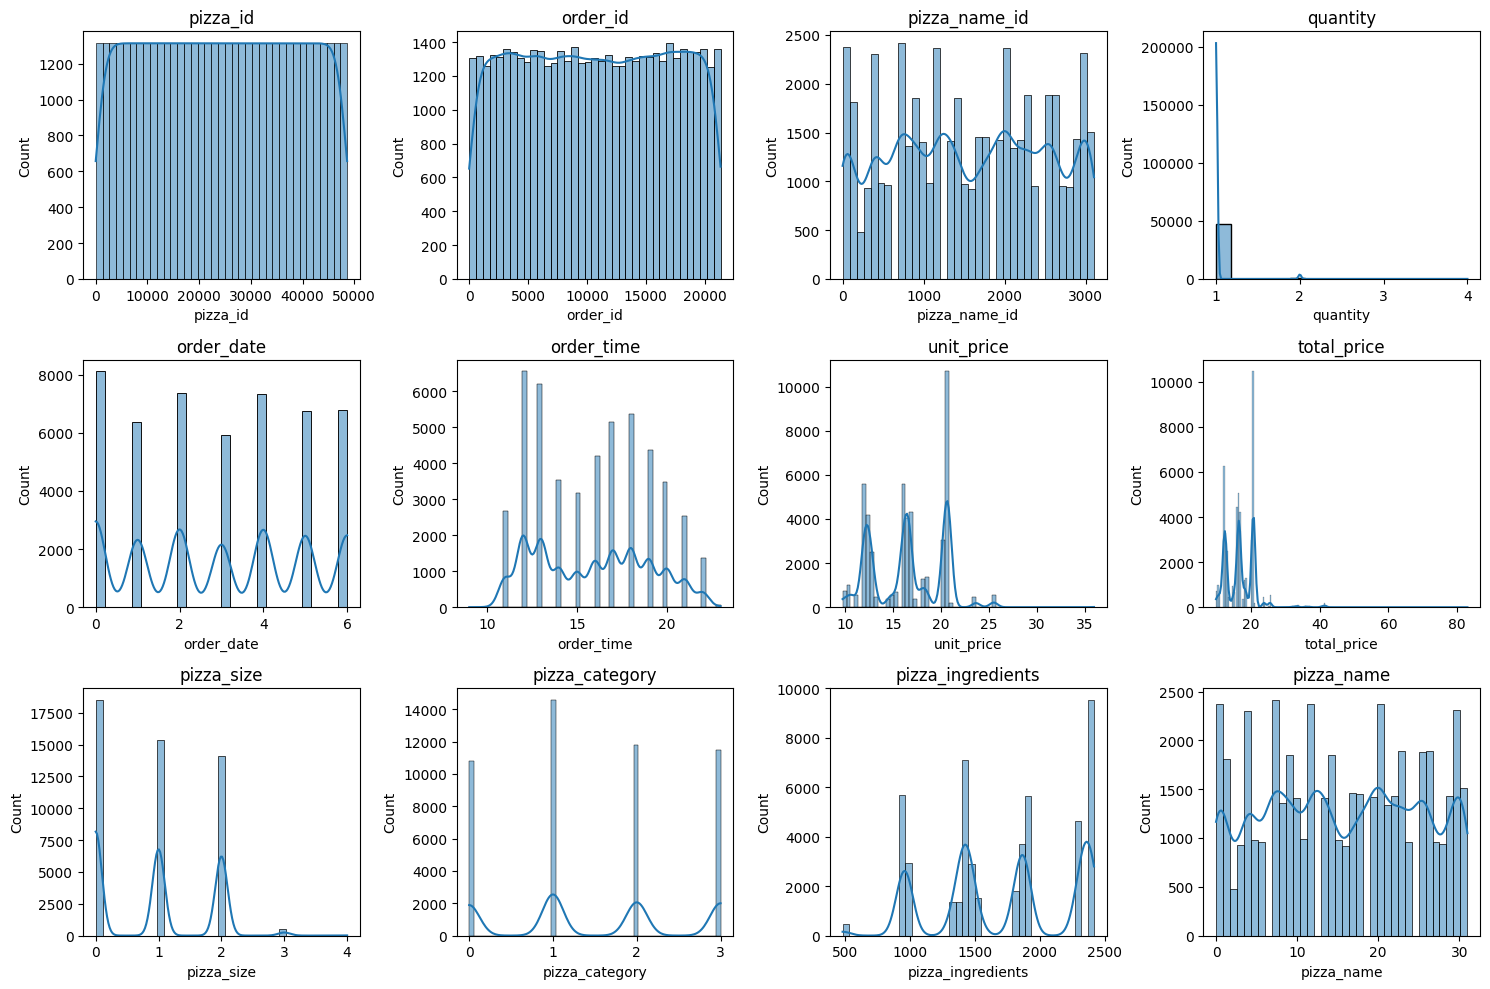

In [235]:
# Selecting numeric columns
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Plotting distributions of numeric variables
plt.figure(figsize=(15, 10))

for i, column in enumerate(numeric_columns):
    plt.subplot(3, 4, i+1)
    sns.histplot(df[column], kde=True)
    plt.title(column)
    plt.tight_layout()

plt.show()

## **Q4. Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)**

**#4.1 Corelation matrix using heatmap**

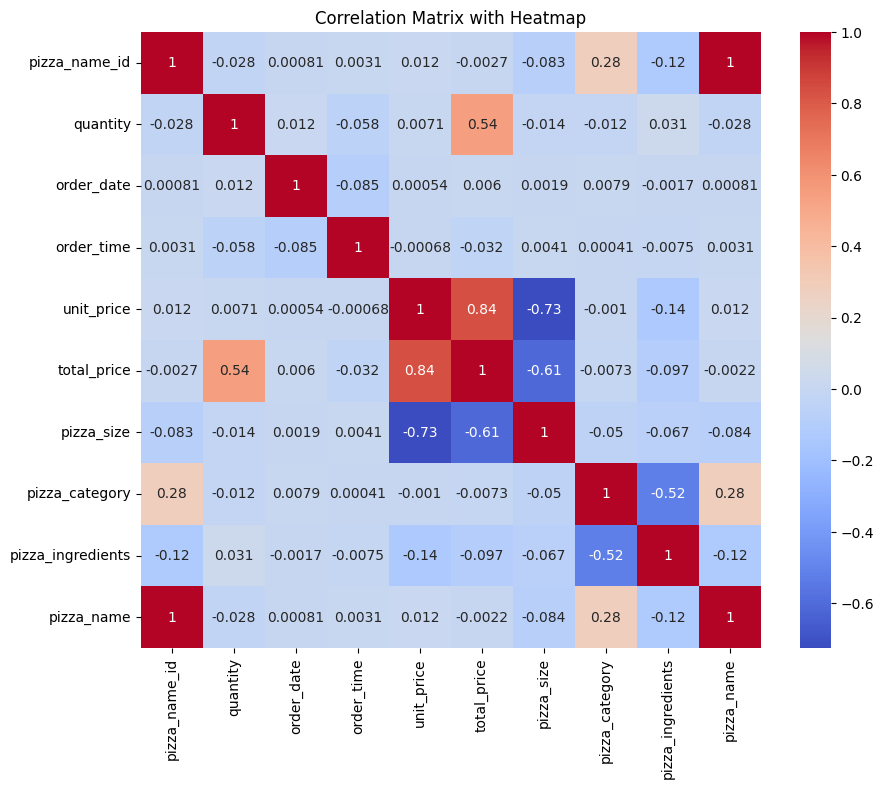

In [149]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix with Heatmap")
plt.show()

**#4.2 Random Forest Regression**


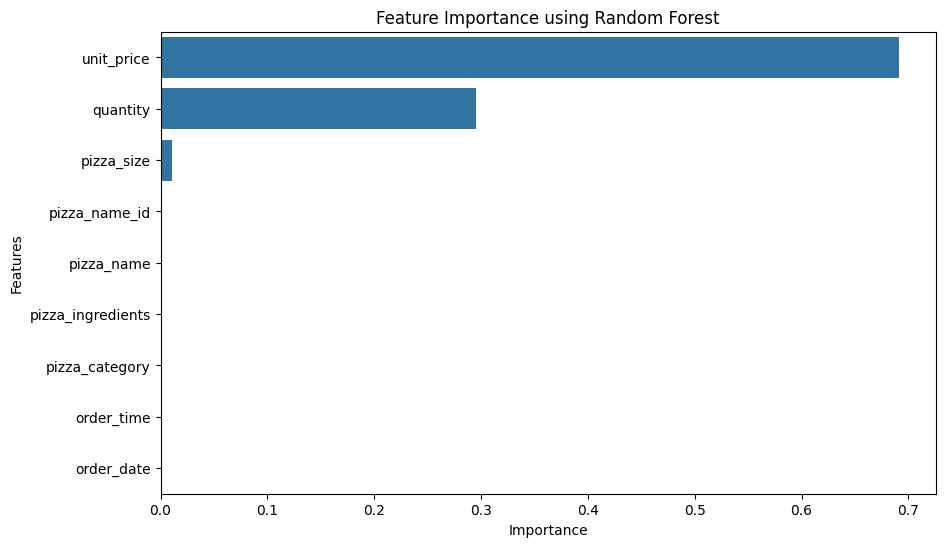

In [150]:
# Preparing the data
X = df.drop('total_price', axis=1)  # Independent variables
y = df['total_price']  # Dependent variable (target)

# Creating and fitting the Random Forest model
random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(X, y)

# Extracting feature importances
feature_importances = random_forest.feature_importances_
features = X.columns
rf_importances = pd.Series(feature_importances, index=features).sort_values(ascending=False)

# Plotting feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=rf_importances, y=rf_importances.index)
plt.title("Feature Importance using Random Forest")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

**#4.3 LASSO Regression**


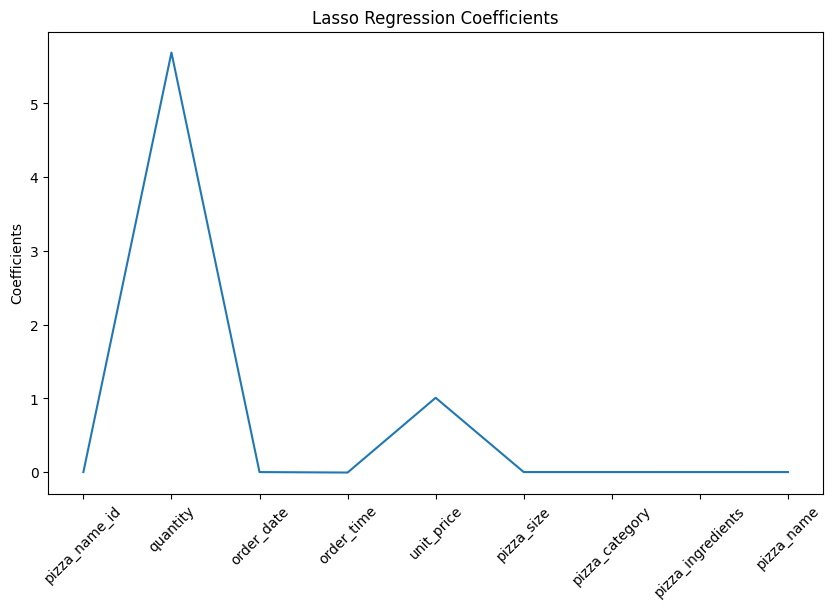

In [151]:
# Preparing the data
X = df.drop('total_price', axis=1)  # Independent variables
y = df['total_price']  # Dependent variable (target)

# Lasso Regression with cross-validation to find the best alpha
lasso = LassoCV(cv=5, random_state=0)
lasso.fit(X, y)

# Plotting the Lasso coefficients
plt.figure(figsize=(10, 6))
plt.plot(range(len(X.columns)), lasso.coef_)
plt.xticks(range(len(X.columns)), X.columns, rotation=45)
plt.ylabel('Coefficients')
plt.title('Lasso Regression Coefficients')
plt.show()

## **Q5. Which independent variables have missing data? How much?**
Ans: There are no null values in the dataset. Hence, there are no missing data in any of the independent variables.

Splitting the dataset for model training

In [153]:
# Splitting the dataset into training and testing sets
X = df.drop('total_price', axis=1)
y = df['total_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **Q6. Do the training and test sets have the same data?**
No, the tarining and testing dataset does not have the same data.

## **Q7. In the predictor variables independent of all the other predictor variables?**
Ans: No, not all the predictor variables are not independent of all other predictor variables. For example, pizza_name_id is dependent on the pizza_name and pizza_size column. Similarly, order_time and order_date are dependent on each other

## **Q8. Which predictor variables are the most important?**
Ans: According to the outputs of the above three methods used in predicting the target variable, **quantity **and** the unit_price** are the most important predictor variables.
As the total_price will change according to the quantity of the pizza and prize of each pizza. Hence, unit_price and quantity are the most important predictor variables.

## **Q9. Do the ranges of the predictor variables make sense?**

In [237]:
df.describe()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
count,48620.000000,48620.000000,48620.000000,48620.000000,48620.000000,48620.000000,48620.000000,48620.000000,48620.000000,48620.000000,48620.000000,48620.000000
mean,24310.500000,10701.479761,1552.243994,1.019622,2.934369,15.911806,16.494132,16.821474,0.933834,1.490745,1704.109255,15.513102
std,14035.529381,6180.119770,932.947049,0.143077,2.033692,3.149836,3.621789,4.437398,0.846981,1.079711,517.757133,9.330179
min,1.000000,1.000000,0.000000,1.000000,0.000000,9.000000,9.750000,9.750000,0.000000,0.000000,480.000000,0.000000
25%,12155.750000,5337.000000,702.000000,1.000000,1.000000,13.000000,12.750000,12.750000,0.000000,1.000000,1406.000000,7.000000
50%,24310.500000,10682.500000,1502.000000,1.000000,3.000000,16.000000,16.500000,16.500000,1.000000,1.000000,1811.000000,15.000000
75%,36465.250000,16100.000000,2302.000000,1.000000,5.000000,18.000000,20.250000,20.500000,2.000000,2.000000,2302.000000,23.000000
max,48620.000000,21350.000000,3102.000000,4.000000,6.000000,23.000000,35.950000,83.000000,4.000000,3.000000,2416.000000,31.000000


Scanning through the min and max values of each column we can infere that there are no negative values in any of the columns. Hence, the range of the predictor variables make full sense.

## **MODEL TRAINING FOR ORIGINAL DATASET**

## **Linear Refression model**

In [154]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Predicting and evaluating the model
y_pred_linear = linear_reg.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)

# Returning Mean Squared Error and Root Mean Squared Error for Random Forest Regressor Model
print("Mean Squraed Error:",mse_linear)
print("Root Mean Squared Error: ",rmse_linear)

(0.31097606859529886, 0.5576522828746412)

## **Random Forest Regressor Model**

In [155]:
random_forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_reg.fit(X_train, y_train)

# Predicting and evaluating the model
y_pred_rf = random_forest_reg.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

# Returning Mean Squared Error and Root Mean Squared Error for Random Forest Regressor Model
print("Mean Squraed Error:",mse_rf)
print("Root Mean Squared Error: ",rmse_rf)

(0.006096958350473061, 0.07808302216534053)

## **Gradient Boosting Regressor Model**

In [156]:
gradient_boosting_reg = GradientBoostingRegressor(n_estimators=100, random_state=42)
gradient_boosting_reg.fit(X_train, y_train)

# Predicting and evaluating the model
y_pred_gb = gradient_boosting_reg.predict(X_test)
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)

# Returning Mean Squared Error and Root Mean Squared Error for Random Forest Regressor Model
print("Mean Squraed Error:",mse_gb)
print("Root Mean Squared Error: ",rmse_gb)

(0.002767579582471226, 0.052607790131036926)

## **Q10. Remove outliers and keep outliers (does if have an effect of the final predictive model)?**

## **DETECTING, COUNTING AND REMOVING THE OUTLIERS**

In [167]:
# Exclude 'total_price' column
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
numeric_columns = numeric_columns.drop(['total_price'])  # Remove 'total_price'

# Detect and count outliers for each numeric column
outliers_count = {}

# Create a copy of the DataFrame with outliers removed
df_cleaned = df.copy()

# Detect and remove outliers for each numeric column
for column in numeric_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    outliers_count[column] = len(outliers)
    df_cleaned = df_cleaned[(df_cleaned[column] >= lower_bound) & (df_cleaned[column] <= upper_bound)]

# Print the number of outliers removed for each column
for column, count in outliers_count.items():
    print(f'Outliers removed in {column}: {count}')

# df_cleaned now contains the DataFrame with outliers removed

Outliers removed in pizza_name_id: 0
Outliers removed in quantity: 927
Outliers removed in order_date: 0
Outliers removed in order_time: 0
Outliers removed in unit_price: 28
Outliers removed in pizza_size: 0
Outliers removed in pizza_category: 0
Outliers removed in pizza_ingredients: 0
Outliers removed in pizza_name: 0


In [168]:
# Exclude 'total_price' column
numeric_columns = df_cleaned.select_dtypes(include=['int64', 'float64']).columns
numeric_columns = numeric_columns.drop(['total_price'])  # Remove 'total_price'

# Dictionary to store outlier counts for each column
outlier_counts = {}

# Detect and count outliers for each numeric column
for column in numeric_columns:
    Q1 = df_cleaned[column].quantile(0.25)
    Q3 = df_cleaned[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_cleaned[(df_cleaned[column] < lower_bound) | (df_cleaned[column] > upper_bound)]
    outlier_counts[column] = len(outliers)
    print(f'Outliers in {column}: {len(outliers)}')

# Print the outlier counts for each column
for column, count in outlier_counts.items():
    print(f'Outliers in {column}: {count}')

Outliers in pizza_name_id: 0
Outliers in quantity: 0
Outliers in order_date: 0
Outliers in order_time: 0
Outliers in unit_price: 0
Outliers in pizza_size: 0
Outliers in pizza_category: 0
Outliers in pizza_ingredients: 0
Outliers in pizza_name: 0
Outliers in pizza_name_id: 0
Outliers in quantity: 0
Outliers in order_date: 0
Outliers in order_time: 0
Outliers in unit_price: 0
Outliers in pizza_size: 0
Outliers in pizza_category: 0
Outliers in pizza_ingredients: 0
Outliers in pizza_name: 0


## **SPLITTING OF DATA AND LINEAR REGRESSION MODEL FOR THE CLEANED DATASET**

In [169]:
# Splitting the dataset into training and testing sets
X = df_cleaned.drop('total_price', axis=1)
y = df_cleaned['total_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Linear Refression model for df_cleaned
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Predicting and evaluating the model
y_pred_linear = linear_reg.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)

# Returning Mean Squared Error and Root Mean Squared Error for Random Forest Regressor Model
print("Mean Squraed Error:",mse_linear)
print("Root Mean Squared Error: ",rmse_linear)

(7.242691431126186e-29, 8.510400361396745e-15)

## **Random Forest Regressor Model for cleaned data**

In [170]:
#Random Forest Regression for df_cleaned
random_forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_reg.fit(X_train, y_train)

# Predicting and evaluating the model
y_pred_rf = random_forest_reg.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

# Returning Mean Squared Error and Root Mean Squared Error for Random Forest Regressor Model
print("Mean Squraed Error:",mse_rf)
print("Root Mean Squared Error: ",rmse_rf)

(1.2106073113417931e-28, 1.1002760159804417e-14)

## **GRADIENT BOOSTING MODEL FOR THE CLEANED DATA**

In [171]:
#Gradient Boosting for df_cleaned
gradient_boosting_reg = GradientBoostingRegressor(n_estimators=100, random_state=42)
gradient_boosting_reg.fit(X_train, y_train)

# Predicting and evaluating the model
y_pred_gb = gradient_boosting_reg.predict(X_test)
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)

# Returning Mean Squared Error and Root Mean Squared Error for Random Forest Regressor Model
print("Mean Squraed Error:",mse_gb)
print("Root Mean Squared Error: ",rmse_gb)

(2.8813378310051824e-08, 0.0001697450391323759)

## **Q11. Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.**

## **FOR REMOVING AND IMPUTATION 1% OF DATA**

# **MEAN FOR 1%**

Randomly remove 1% data for mean

In [ ]:
# Make a copy of the DataFrame to work with
df_copy = df.copy()

# Remove 1% of data randomly from 'pizza_size' column
n_to_remove = int(0.01 * len(df_copy))
random_indices = np.random.choice(df_copy.index, size=n_to_remove, replace=False)
df_copy.loc[random_indices, 'pizza_size'] = np.nan
df_copy['pizza_size'].isnull().sum()

Imputing values by mean

In [178]:
mean_pizza_size = df_copy['pizza_size'].mean()
df_copy['pizza_size'] = df_copy['pizza_size'].fillna(mean_pizza_size)
df_copy['pizza_size'].isnull().sum()

RANDOM FOREST REGRESSION MODEL

In [180]:
# Splitting the dataset into training and testing sets
X = df_copy.drop('total_price', axis=1)
y = df_copy['total_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Random Forest Regression for df_cleaned
from sklearn.ensemble import RandomForestRegressor

# Random Forest Regressor Model
random_forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_reg.fit(X_train, y_train)

# Predicting and evaluating the model
y_pred_rf = random_forest_reg.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

# Returning Mean Squared Error and Root Mean Squared Error for Random Forest Regressor Model
print("Mean Squraed Error:",mse_rf)
print("Root Mean Squared Error: ",rmse_rf)

(0.004880580548128338, 0.06986115192385778)

## **MEDIAN FOR 1%**

Randomly imputing 1% null values for meadian

In [189]:
# Make a copy of the DataFrame to work with
df_median1 = df.copy()

# Remove 1% of data randomly from 'pizza_size' column
n_to_remove = int(0.01 * len(df_median1))
random_indices = np.random.choice(df_median1.index, size=n_to_remove, replace=False)
df_median1.loc[random_indices, 'pizza_size'] = np.nan
df_median1['pizza_size'].isnull().sum()

486

Imputing values by median for 1%

In [190]:
median_pizza_size = df_copy['pizza_size'].median()
df_median1['pizza_size'] = df_median1['pizza_size'].fillna(median_pizza_size)
df_median1['pizza_size'].isnull().sum()

0

Random Forest Regression Model

In [191]:
# Splitting the dataset into training and testing sets
X = df_median1.drop('total_price', axis=1)
y = df_median1['total_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Random Forest Regression for df_cleaned
random_forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_reg.fit(X_train, y_train)

# Predicting and evaluating the model
y_pred_rf = random_forest_reg.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

# Returning Mean Squared Error and Root Mean Squared Error for Random Forest Regressor Model
print("Mean Squraed Error:",mse_rf)
print("Root Mean Squared Error: ",rmse_rf)

(0.005772371040723979, 0.07597612151672378)

## **MODE FOR 1%**

Remove 1% of data randomly from 'pizza_size' column for mode

In [184]:
# Make a copy of the DataFrame to work with
df_mode1 = df.copy()

# Remove 1% of data randomly from 'pizza_size' column
n_to_remove = int(0.01 * len(df_mode1))
random_indices = np.random.choice(df_mode1.index, size=n_to_remove, replace=False)
df_mode1.loc[random_indices, 'pizza_size'] = np.nan
df_mode1['pizza_size'].isnull().sum()

486

Imputing values by mode for 1%

In [187]:
mode_pizza_size = df_mode1['pizza_size'].mode()[0]
df_mode1['pizza_size'] = df_mode1['pizza_size'].fillna(mode_pizza_size)
df_mode1['pizza_size'].isnull().sum()

0

Random Forest

In [188]:
# Splitting the dataset into training and testing sets
X = df_mode1.drop('total_price', axis=1)
y = df_mode1['total_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Random Forest Regression for df_mode1
random_forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_reg.fit(X_train, y_train)

# Predicting and evaluating the model
y_pred_rf = random_forest_reg.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

# Returning Mean Squared Error and Root Mean Squared Error for Random Forest Regressor Model
print("Mean Squraed Error:",mse_rf)
print("Root Mean Squared Error: ",rmse_rf)

(0.010483196138420406, 0.10238748037929445)

## **FOR REMOVING AND IMPUTATION 1% OF DATA**

## **MEAN FOR 5%**

Removing 5% of data randomly


In [195]:
# Make a copy of the DataFrame to work with
df_mean5 = df.copy()

# Remove 1% of data randomly from 'pizza_size' column
n_to_remove = int(0.05 * len(df_mean5))
random_indices = np.random.choice(df_mean5.index, size=n_to_remove, replace=False)
df_mean5.loc[random_indices, 'pizza_size'] = np.nan
df_mean5['pizza_size'].isnull().sum()

2431

Imputing values by mean for 5%

In [197]:
mean5_pizza_size = df_mean5['pizza_size'].mean()
df_mean5['pizza_size'] = df_mean5['pizza_size'].fillna(median_pizza_size)
df_mean5['pizza_size'].isnull().sum()

0

Regression Forest

In [199]:
# Splitting the dataset into training and testing sets
X = df_mean5.drop('total_price', axis=1)
y = df_mean5['total_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Random Forest Regression for df_cleaned
random_forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_reg.fit(X_train, y_train)

# Predicting and evaluating the model
y_pred_rf = random_forest_reg.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

# Returning Mean Squared Error and Root Mean Squared Error for Random Forest Regressor Model
print("Mean Squraed Error:",mse_rf)
print("Root Mean Squared Error: ",rmse_rf)

(0.005774923076923074, 0.07599291464947949)

### **MODE FOR 5%**

Removing 5% of data randomly for mode

In [200]:
# Make a copy of the DataFrame to work with
df_mode5 = df.copy()

# Remove 1% of data randomly from 'pizza_size' column
n_to_remove = int(0.05 * len(df_mode5))
random_indices = np.random.choice(df_mode5.index, size=n_to_remove, replace=False)
df_mode5.loc[random_indices, 'pizza_size'] = np.nan
df_mode5['pizza_size'].isnull().sum()

2431

Imputing values by mode for 5%

In [201]:
mode5_pizza_size = df_mode5['pizza_size'].mode()[0]
df_mode5['pizza_size'] = df_mode5['pizza_size'].fillna(mode5_pizza_size)
df_mode5['pizza_size'].isnull().sum()

0

Regression Forest


In [202]:
# Splitting the dataset into training and testing sets
X = df_mode5.drop('total_price', axis=1)
y = df_mode5['total_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Random Forest Regression for df_cleaned
random_forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_reg.fit(X_train, y_train)

# Predicting and evaluating the model
y_pred_rf = random_forest_reg.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

# Returning Mean Squared Error and Root Mean Squared Error for Random Forest Regressor Model
print("Mean Squraed Error:",mse_rf)
print("Root Mean Squared Error: ",rmse_rf)

(0.0047816133535582, 0.06914921079490495)

## **MEDIAN FOR 5%**

Removing 5% of data randomly for meadian


In [203]:
# Make a copy of the DataFrame to work with
df_median5 = df.copy()

# Remove 1% of data randomly from 'pizza_size' column
n_to_remove = int(0.05 * len(df_median5))
random_indices = np.random.choice(df_median5.index, size=n_to_remove, replace=False)
df_median5.loc[random_indices, 'pizza_size'] = np.nan
df_median5['pizza_size'].isnull().sum()

2431

Imputing values by median for 5%

In [204]:
median5_pizza_size = df_median5['pizza_size'].median()
df_median5['pizza_size'] = df_median5['pizza_size'].fillna(median5_pizza_size)
df_median5['pizza_size'].isnull().sum()

0

Regression Forest

In [205]:
# Splitting the dataset into training and testing sets
X = df_median5.drop('total_price', axis=1)
y = df_median5['total_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Random Forest Regression for df_median5
random_forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_reg.fit(X_train, y_train)

# Predicting and evaluating the model
y_pred_rf = random_forest_reg.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

# Returning Mean Squared Error and Root Mean Squared Error for Random Forest Regressor Model
print("Mean Squraed Error:",mse_rf)
print("Root Mean Squared Error: ",rmse_rf)

(0.0072240545300287905, 0.08499443822997356)

## **FOR REMOVING AND IMPUTATION 10% OF DATA**

## **MEDIAN FOR 10%**

Removing 10% of data randomly for meadian

In [206]:
# Make a copy of the DataFrame to work with
df_median10 = df.copy()

# Remove 10% of data randomly from 'pizza_size' column
n_to_remove = int(0.10 * len(df_median10))
random_indices = np.random.choice(df_median10.index, size=n_to_remove, replace=False)
df_median10.loc[random_indices, 'pizza_size'] = np.nan
df_median10['pizza_size'].isnull().sum()

4862

In [207]:
#imputing values by median for 10%
median10_pizza_size = df_median10['pizza_size'].median()
df_median10['pizza_size'] = df_median10['pizza_size'].fillna(median5_pizza_size)
df_median10['pizza_size'].isnull().sum()

0

Regression Forest

In [208]:
# Splitting the dataset into training and testing sets
X = df_median10.drop('total_price', axis=1)
y = df_median10['total_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Random Forest Regression for df_median10
# Random Forest Regressor Model
random_forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_reg.fit(X_train, y_train)

# Predicting and evaluating the model
y_pred_rf = random_forest_reg.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

# Returning Mean Squared Error and Root Mean Squared Error for Random Forest Regressor Model
print("Mean Squraed Error:",mse_rf)
print("Root Mean Squared Error: ",rmse_rf)

(0.0072689968377211206, 0.08525841212291677)

## **MODE FOR 10%**

Removing 10% of data randomly for mode


In [209]:
# Make a copy of the DataFrame to work with
df_mode10 = df.copy()

# Remove 10% of data randomly from 'pizza_size' column
n_to_remove = int(0.10 * len(df_mode10))
random_indices = np.random.choice(df_mode5.index, size=n_to_remove, replace=False)
df_mode10.loc[random_indices, 'pizza_size'] = np.nan
df_mode10['pizza_size'].isnull().sum()

4862

Imputing values by mode for 10%

In [210]:
mode10_pizza_size = df_mode10['pizza_size'].mode()[0]
df_mode10['pizza_size'] = df_mode10['pizza_size'].fillna(mode10_pizza_size)
df_mode10['pizza_size'].isnull().sum()

0

Regression Forest Regression

In [211]:
# Splitting the dataset into training and testing sets
X = df_mode10.drop('total_price', axis=1)
y = df_mode10['total_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Random Forest Regression for df_mode10
# Random Forest Regressor Model
random_forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_reg.fit(X_train, y_train)

# Predicting and evaluating the model
y_pred_rf = random_forest_reg.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

# Returning Mean Squared Error and Root Mean Squared Error for Random Forest Regressor Model
print("Mean Squraed Error:",mse_rf)
print("Root Mean Squared Error: ",rmse_rf)

(0.004843478403948979, 0.06959510330439189)

# **MEAN FOR 10%**

Removing 10% of data randomly

In [212]:
# Make a copy of the DataFrame to work with
df_mean10 = df.copy()

# Remove 10% of data randomly from 'pizza_size' column
n_to_remove = int(0.10 * len(df_mean10))
random_indices = np.random.choice(df_mode5.index, size=n_to_remove, replace=False)
df_mean10.loc[random_indices, 'pizza_size'] = np.nan
df_mean10['pizza_size'].isnull().sum()

4862

Imputing values by mean for 10%

In [213]:
mean10_pizza_size = df_mode10['pizza_size'].mean()
df_mean10['pizza_size'] = df_mean10['pizza_size'].fillna(mean10_pizza_size)
df_mean10['pizza_size'].isnull().sum()

0

Random Forest Regression

In [216]:
# Splitting the dataset into training and testing sets
X = df_mean10.drop('total_price', axis=1)
y = df_mean10['total_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Random Forest Regression for df_mean10
# Random Forest Regressor Model
random_forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_reg.fit(X_train, y_train)

# Predicting and evaluating the model
y_pred_rf = random_forest_reg.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

# Returning Mean Squared Error and Root Mean Squared Error for Random Forest Regressor Model
print("Mean Squraed Error:",mse_rf)
print("Root Mean Squared Error: ",rmse_rf)

Mean Squraed Error: 0.005403150478198291
Root Mean Squared Error:  0.07350612544678362


## **REFERENCES**



1.   Sckit learn offcial documentation
2.   Refered Towards Data Science
3.   Correlation Matrix and Heatmap
4.   Random forest regression
5.   Linear regression
6.   Gradient boosting

**Correlation Matrix and Heatmap:**
The correlation matrix and heatmap were created using the Seaborn library in Python, as outlined in the Seaborn documentation: https://seaborn.pydata.org/
Interpretation of the correlation matrices and heatmap followed the guidance from relevant tutorials and guides used in this analysis.

**Random Forest Regression:**
Random forest regression was implemented in this analysis using Scikit-Learn in Python, and reference was made to the Scikit-Learn documentation: https://scikit-learn.org/stable/documentation.html
The analysis benefited from academic sources such as "Breiman, L. (2001). Random forests. Machine learning, 45(1), 5-32," which provided insights into the random forest algorithm.

**Linear Regression:**
Linear regression was employed in this analysis through the Scikit-Learn library in Python, with reference to its documentation: https://scikit-learn.org/stable/documentation.html
The analysis drew from foundational resources like "Hastie, T., Tibshirani, R., & Friedman, J. (2009). The elements of statistical learning: Data mining, inference, and prediction. Springer," to deepen the understanding of linear regression.

**Gradient Boosting:**
Gradient boosting techniques, including XGBoost, were utilized in this analysis, with reference to the XGBoost documentation: https://xgboost.readthedocs.io/
The analysis incorporated insights from academic sources, such as "Friedman, J. H. (2001). Greedy function approximation: A gradient boosting machine. The Annals of Statistics, 29(5), 1189-1232," which contributed to the understanding of gradient boosting methods.

The algorithms were referred directly from the Sckit learn official documentation. Visualization was referred from the Machine Learning with scikit-learn Quick Start Guide and Towards Data Science (How do you check the quality of your regression model in Python?).

## **LICENSE**

MIT License

Copyright (c) 2024 sakshiraade

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.